### NOTEBOOK CONTENTS

    -plots of DIC difference (BR-PI run) by month for averaged fields at 0, 20, 50, 100, 200 m
    -monthly averaged timeseries of DIC values and their differences for the 4 broad subregions
    -extra DIC by region and depth on one plot

### Leading questions:

#### Does the magnitude extra surface DIC vary much by month, depth, & region?
    
##### By month:
    
    -no interesting pattern in surface, possibly increase in N./C. strait at depth in summer
    
##### By depth:
    -in general, accross all regions, deeper regions have less extra DIC
    -surface extra DIC is very blotchy ('stochastic')
 
##### By region:
    -N./C. strait have marginally more extra DIC (and more variable) DIC than Haro, 
    - JdF has considerably less extra DIC than the above 3
    
#### Do we reproduce coastal high-carbon signal, seasonal surface drawdown?

    -YES! seasonal surface drawdown more pronounced in inner strait than JdF
    - at depth (50m, 200m, see beautiful upwelling signal)

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait


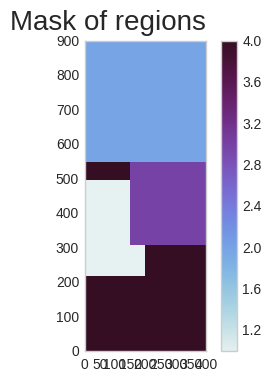

In [4]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('Mask of regions',fontsize=20)
surfmask = mask[0,:,:]
print('1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait')

In [5]:
reg_names = ['Juan de Fuca', 'N. Strait', 'C. Strait', 'Haro Strait']
colours = ['black','orange','green', 'fuchsia']

td = '01jan15'
tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/depth_profile_ncs'
w = nc.Dataset(f'{tdir}/BR2015_{td}_prof.nc')

dp = [0,18,23,26, 30]
for i in range(0,len(dp)):
    print('At depth level ', str(dp[i]), ' depth is ', str(w['Profiles']['depth'][dp[i]]))

At depth level  0  depth is  0.5000003
At depth level  18  depth is  19.481785
At depth level  23  depth is  44.517723
At depth level  26  depth is  98.06296
At depth level  30  depth is  199.57304


## SURFACE DIC DIFFERENCE BR-PI

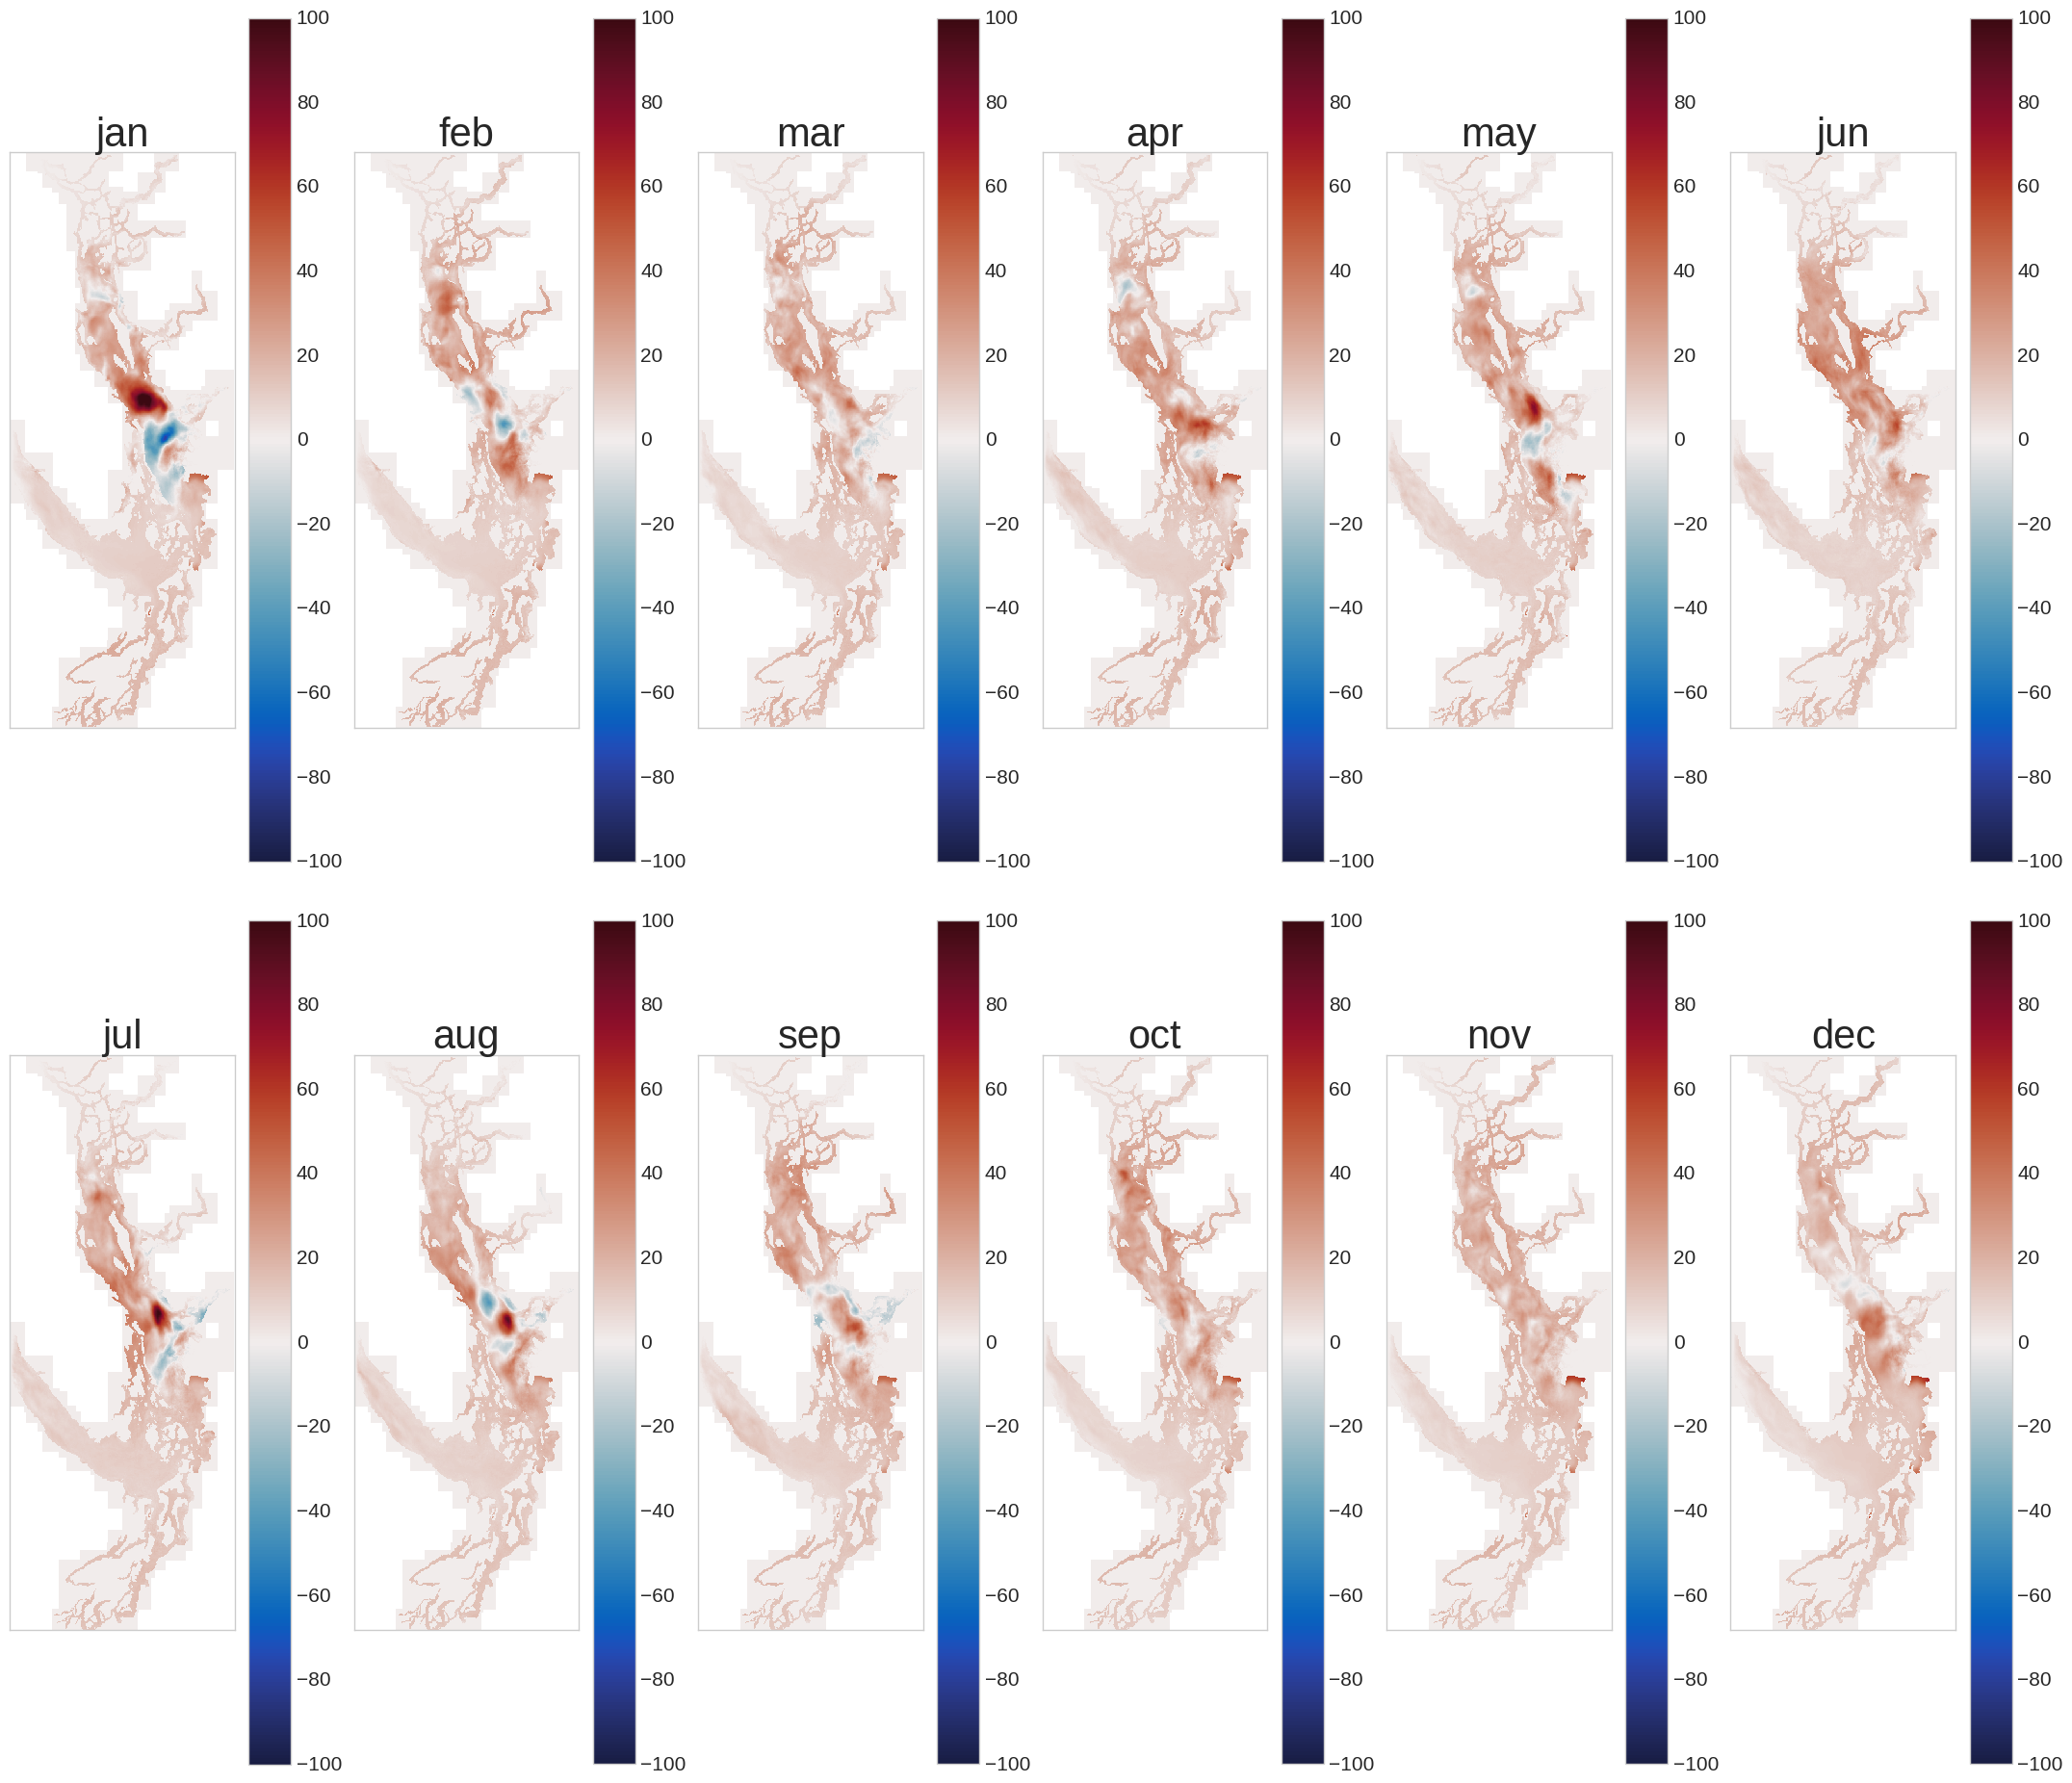

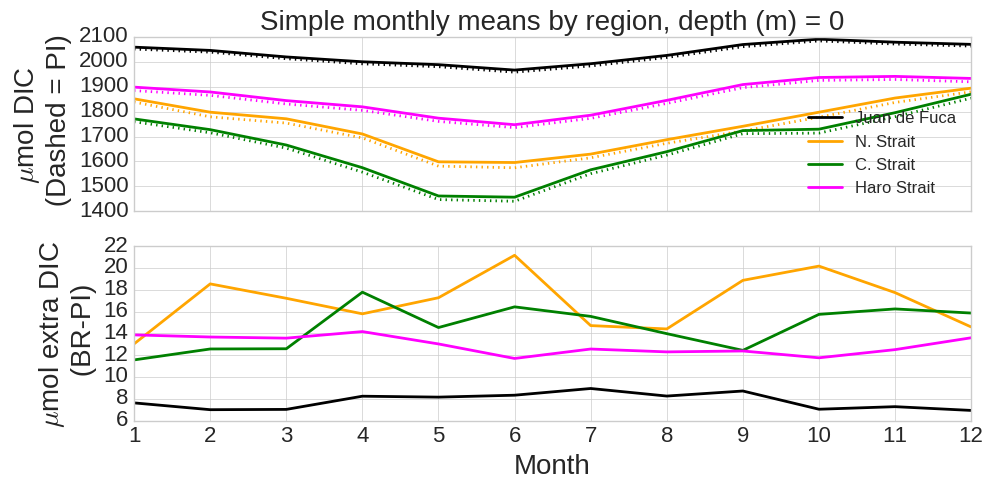

In [6]:
lev = 0

fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
avgs_BR = np.zeros([4,12])
std_devs_BR = np.zeros([4,12])
avgs_PI = np.zeros([4,12])
std_devs_PI = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['dissolved_inorganic_carbon'][0,lev,:,:]
    PI_dat = tnc_PI['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = BR_dat-PI_dat
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan
    for r in range(1,5):
        regBR = BR_dat[surfmask == r]
        regPI = PI_dat[surfmask == r] 
        avgs_BR[r-1,i-1] = np.nanmean(regBR)
        avgs_PI[r-1,i-1] = np.nanmean(regPI)
        std_devs_BR[r-1,i-1] = np.nanstd(regBR)
        std_devs_PI[r-1,i-1] = np.nanstd(regPI)
        
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
#plt.suptitle('BR - PI surface DIC', fontsize =40)
plt.tight_layout()



fact = 0.9
mons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(2,1,1)
for r in range(0,4):
    ax1.plot(mons, avgs_BR[r,:], linewidth = 2, color = colours[r], label = reg_names[r])
    ax1.plot(mons, avgs_PI[r,:], linestyle = ':', \
             linewidth = 2, color = colours[r])
    ax1.set_xlim([1,12])
    
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\mu$mol DIC \n (Dashed = PI)', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

ax2 = fig.add_subplot(2,1,2)
for r in range(0,4):
    ax2.set_xticks(np.arange(1,13,1))
    ax2.plot(mons, avgs_BR[r,:]-avgs_PI[r,:], \
             linewidth = 2, color = colours[r], label = reg_names[r])
    ax2.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax2.set_xlabel('Month', fontsize = 20)
    ax2.set_ylabel('$\mu$mol extra DIC \n (BR-PI)', fontsize = 20)
    
plt.tick_params(axis='both', which='major', labelsize=16)




## 20 m DIC DIFFERENCE BR-PI

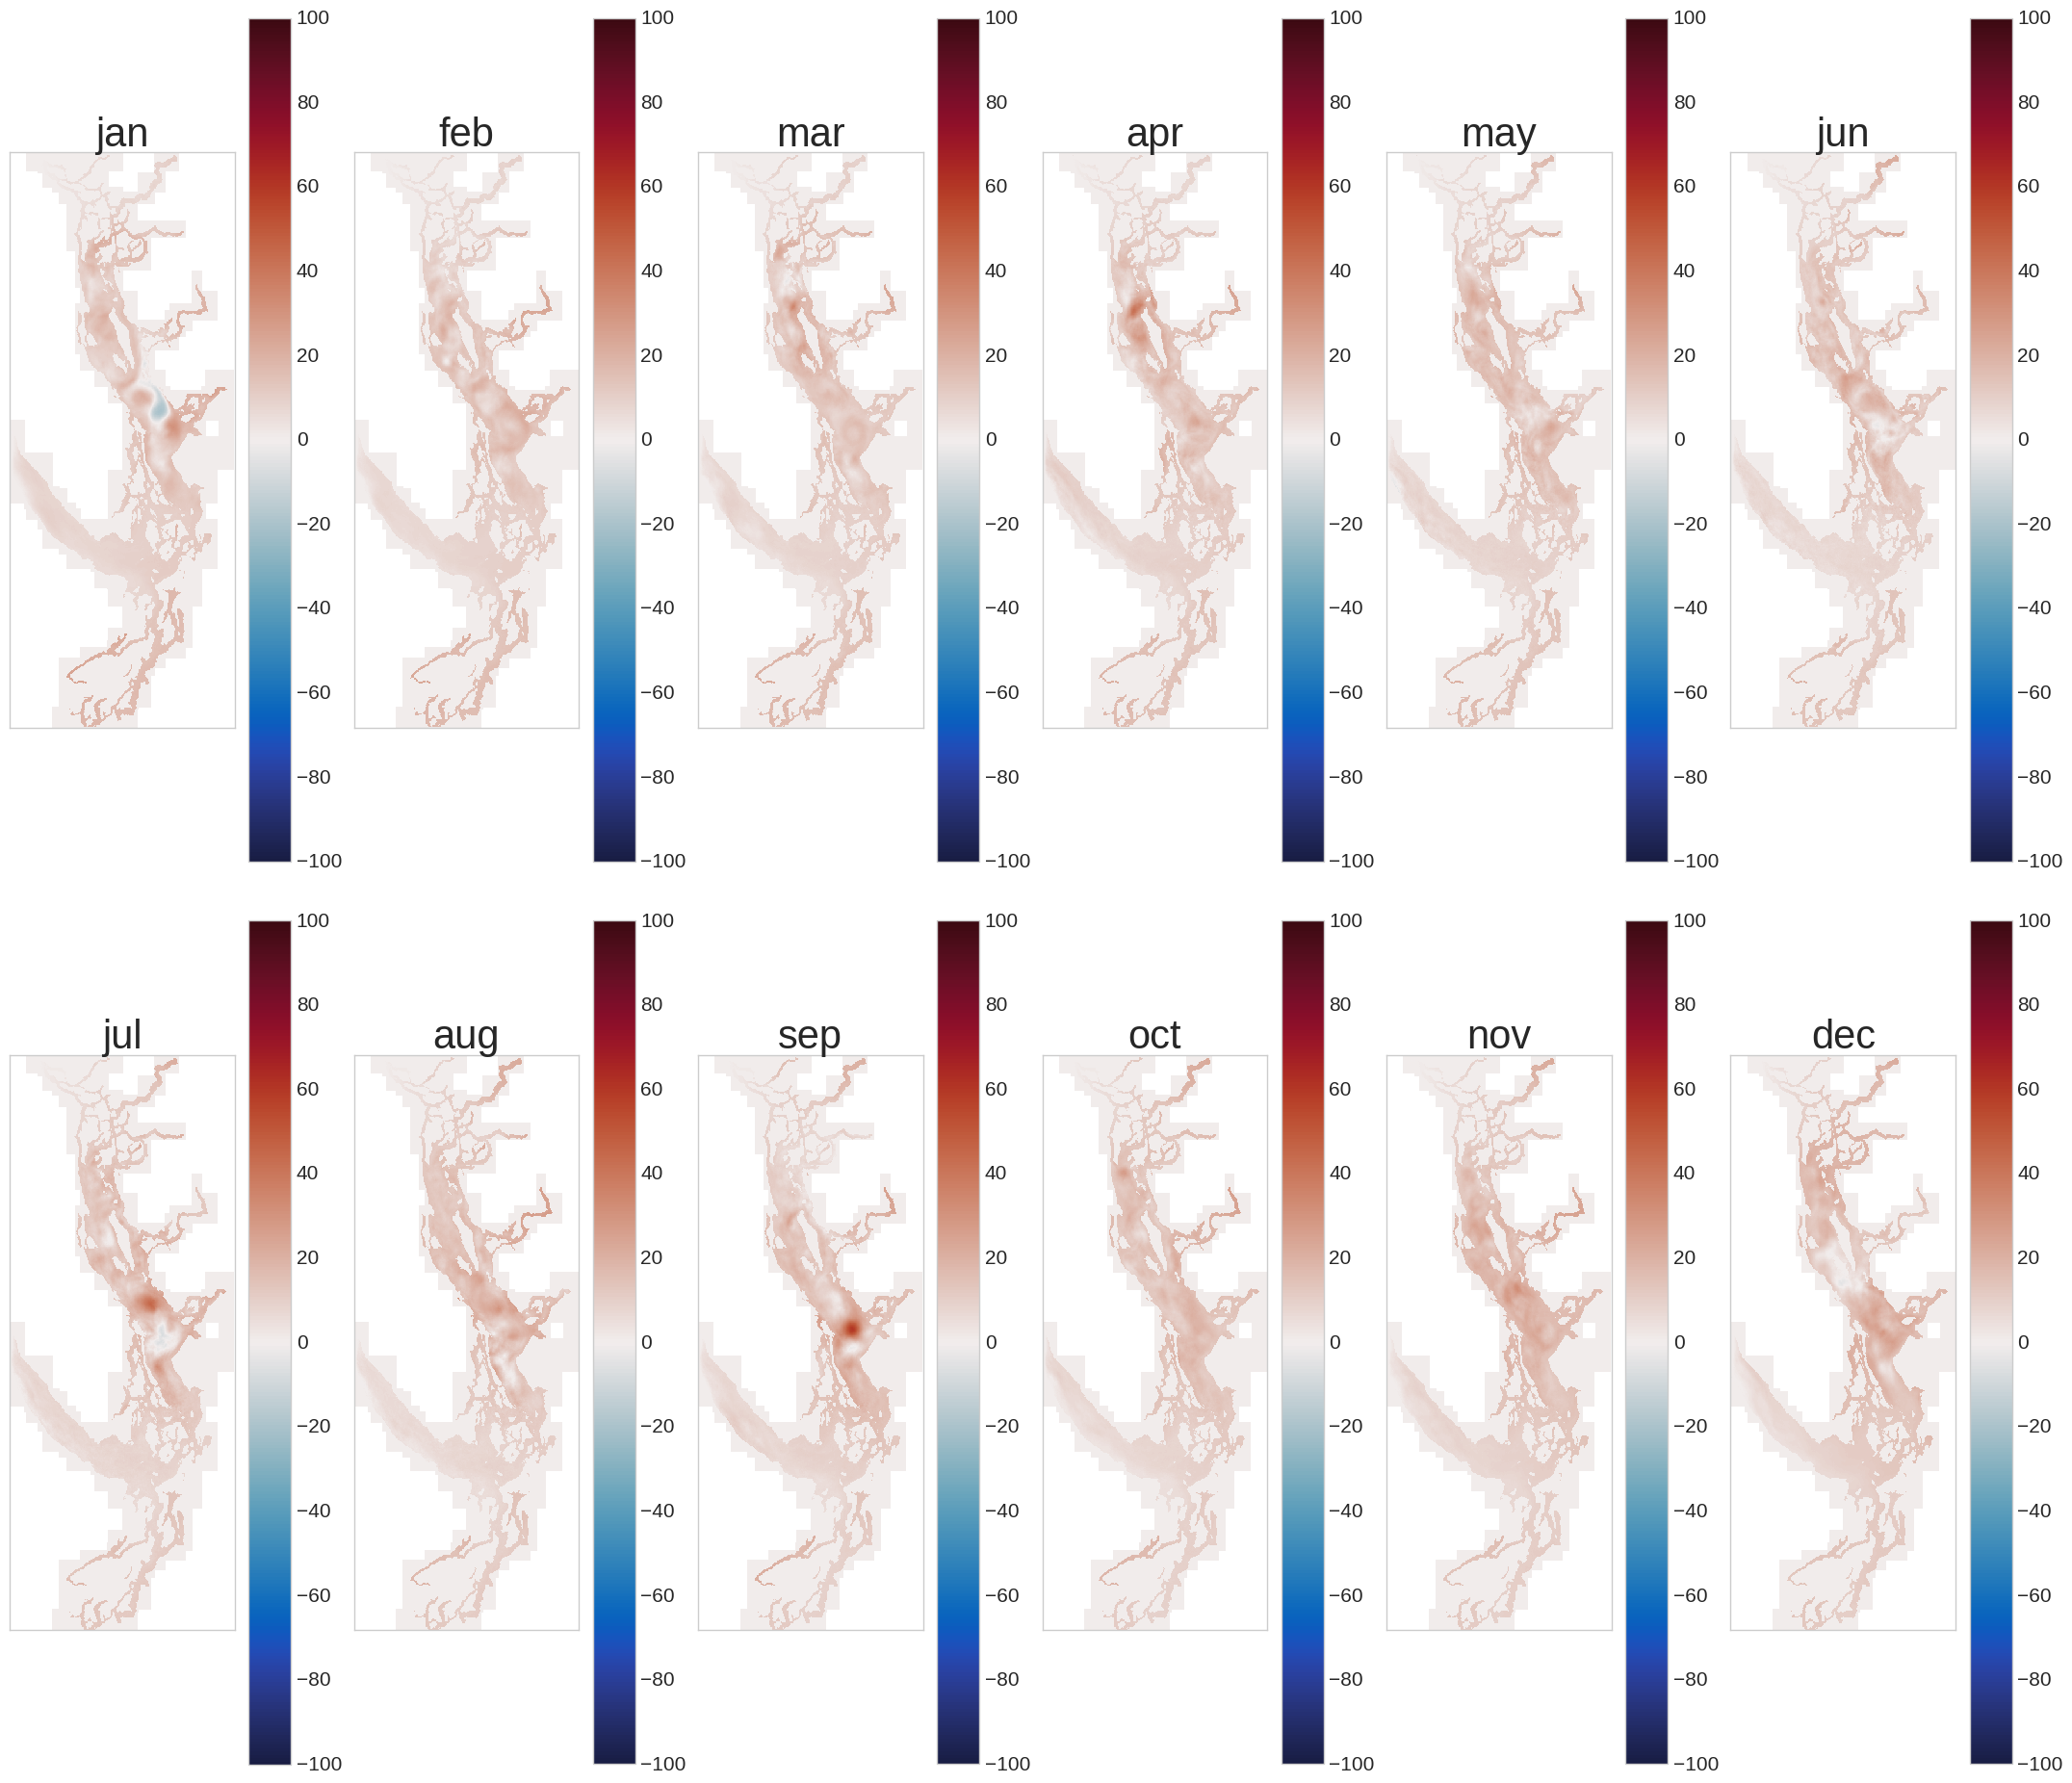

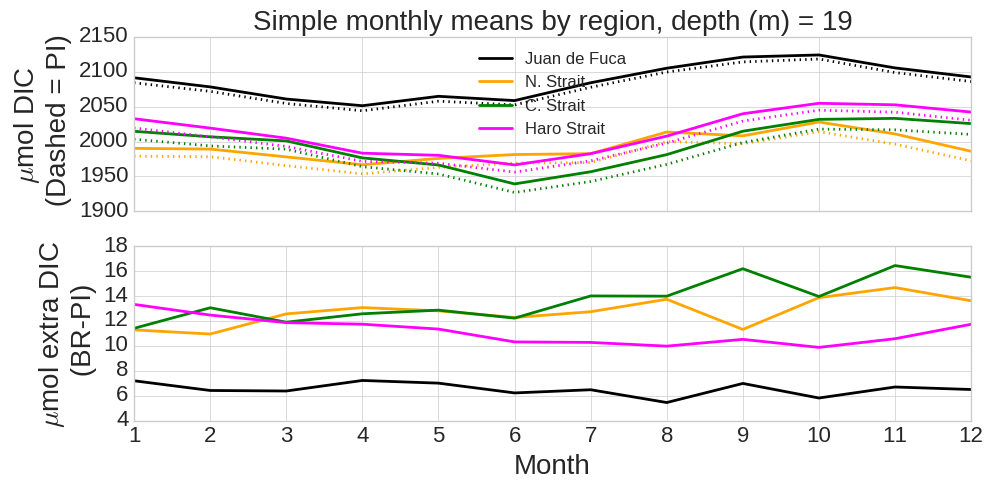

In [7]:
lev = 18

fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
avgs_BR = np.zeros([4,12])
std_devs_BR = np.zeros([4,12])
avgs_PI = np.zeros([4,12])
std_devs_PI = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['dissolved_inorganic_carbon'][0,lev,:,:]
    PI_dat = tnc_PI['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = BR_dat-PI_dat
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan
    for r in range(1,5):
        regBR = BR_dat[surfmask == r]
        regPI = PI_dat[surfmask == r] 
        avgs_BR[r-1,i-1] = np.nanmean(regBR)
        avgs_PI[r-1,i-1] = np.nanmean(regPI)
        std_devs_BR[r-1,i-1] = np.nanstd(regBR)
        std_devs_PI[r-1,i-1] = np.nanstd(regPI)
        
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()

fact = 0.9
mons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(2,1,1)
for r in range(0,4):
    ax1.plot(mons, avgs_BR[r,:], linewidth = 2, color = colours[r], label = reg_names[r])
    ax1.plot(mons, avgs_PI[r,:], linestyle = ':', \
             linewidth = 2, color = colours[r])
    ax1.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\mu$mol DIC \n (Dashed = PI)', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

ax2 = fig.add_subplot(2,1,2)
for r in range(0,4):
    ax2.plot(mons, avgs_BR[r,:]-avgs_PI[r,:], \
             linewidth = 2, color = colours[r], label = reg_names[r])
    ax2.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax2.set_xlabel('Month', fontsize = 20)
    ax2.set_ylabel('$\mu$mol extra DIC \n (BR-PI)', fontsize = 20)
    
plt.tick_params(axis='both', which='major', labelsize=16)




## ~50 m DIC 

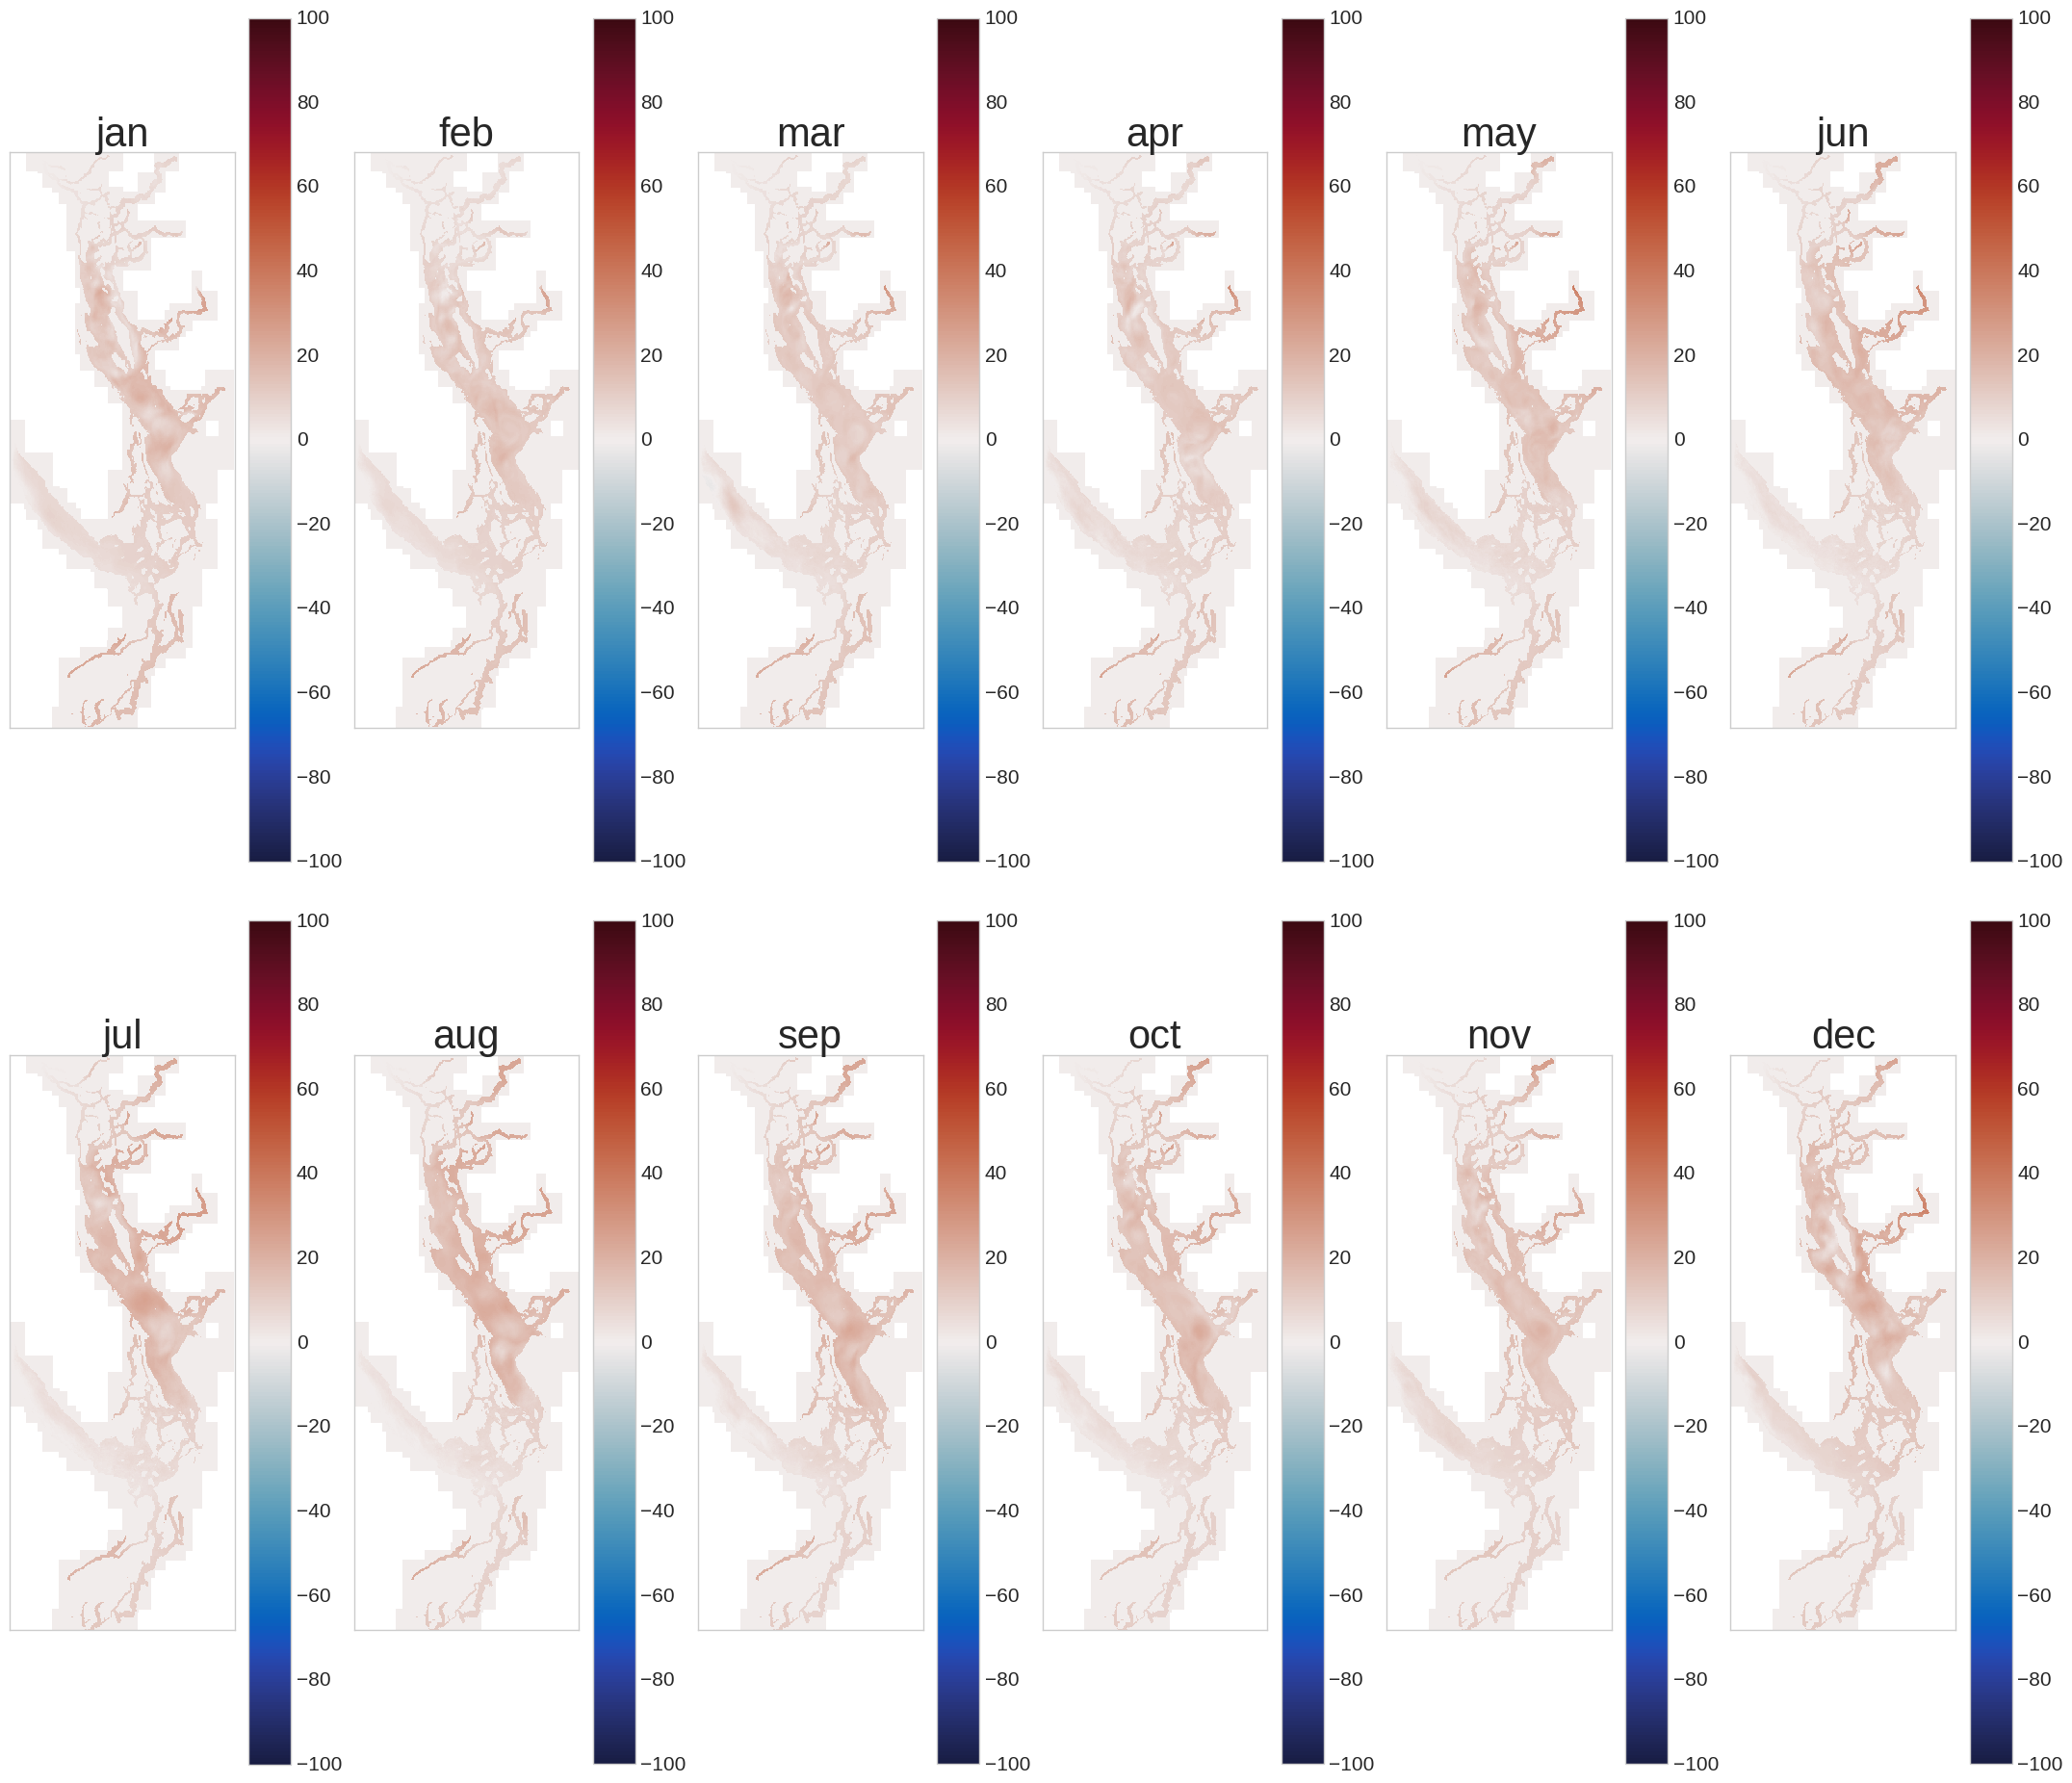

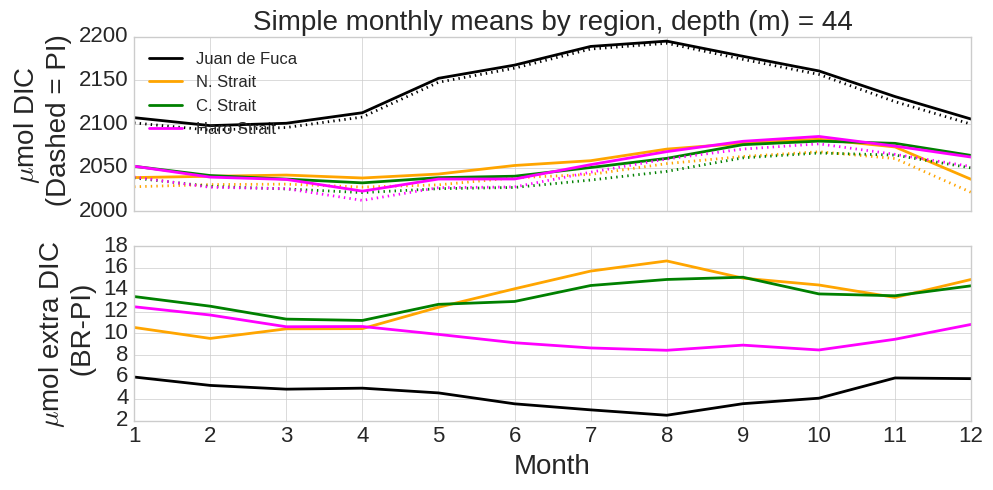

In [8]:
lev = 23

fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
avgs_BR = np.zeros([4,12])
std_devs_BR = np.zeros([4,12])
avgs_PI = np.zeros([4,12])
std_devs_PI = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['dissolved_inorganic_carbon'][0,lev,:,:]
    PI_dat = tnc_PI['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = BR_dat-PI_dat
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan
    for r in range(1,5):
        regBR = BR_dat[surfmask == r]
        regPI = PI_dat[surfmask == r] 
        avgs_BR[r-1,i-1] = np.nanmean(regBR)
        avgs_PI[r-1,i-1] = np.nanmean(regPI)
        std_devs_BR[r-1,i-1] = np.nanstd(regBR)
        std_devs_PI[r-1,i-1] = np.nanstd(regPI)
        
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
#plt.suptitle('BR - PI surface DIC', fontsize =40)
plt.tight_layout()

fact = 0.9
mons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(2,1,1)
for r in range(0,4):
    ax1.plot(mons, avgs_BR[r,:], linewidth = 2, color = colours[r], label = reg_names[r])
    ax1.plot(mons, avgs_PI[r,:], linestyle = ':', \
             linewidth = 2, color = colours[r])
    ax1.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\mu$mol DIC \n (Dashed = PI)', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

ax2 = fig.add_subplot(2,1,2)
for r in range(0,4):
    ax2.plot(mons, avgs_BR[r,:]-avgs_PI[r,:], \
             linewidth = 2, color = colours[r], label = reg_names[r])
    ax2.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax2.set_xlabel('Month', fontsize = 20)
    ax2.set_ylabel('$\mu$mol extra DIC \n (BR-PI)', fontsize = 20)
    
plt.tick_params(axis='both', which='major', labelsize=16)




# ~100 m

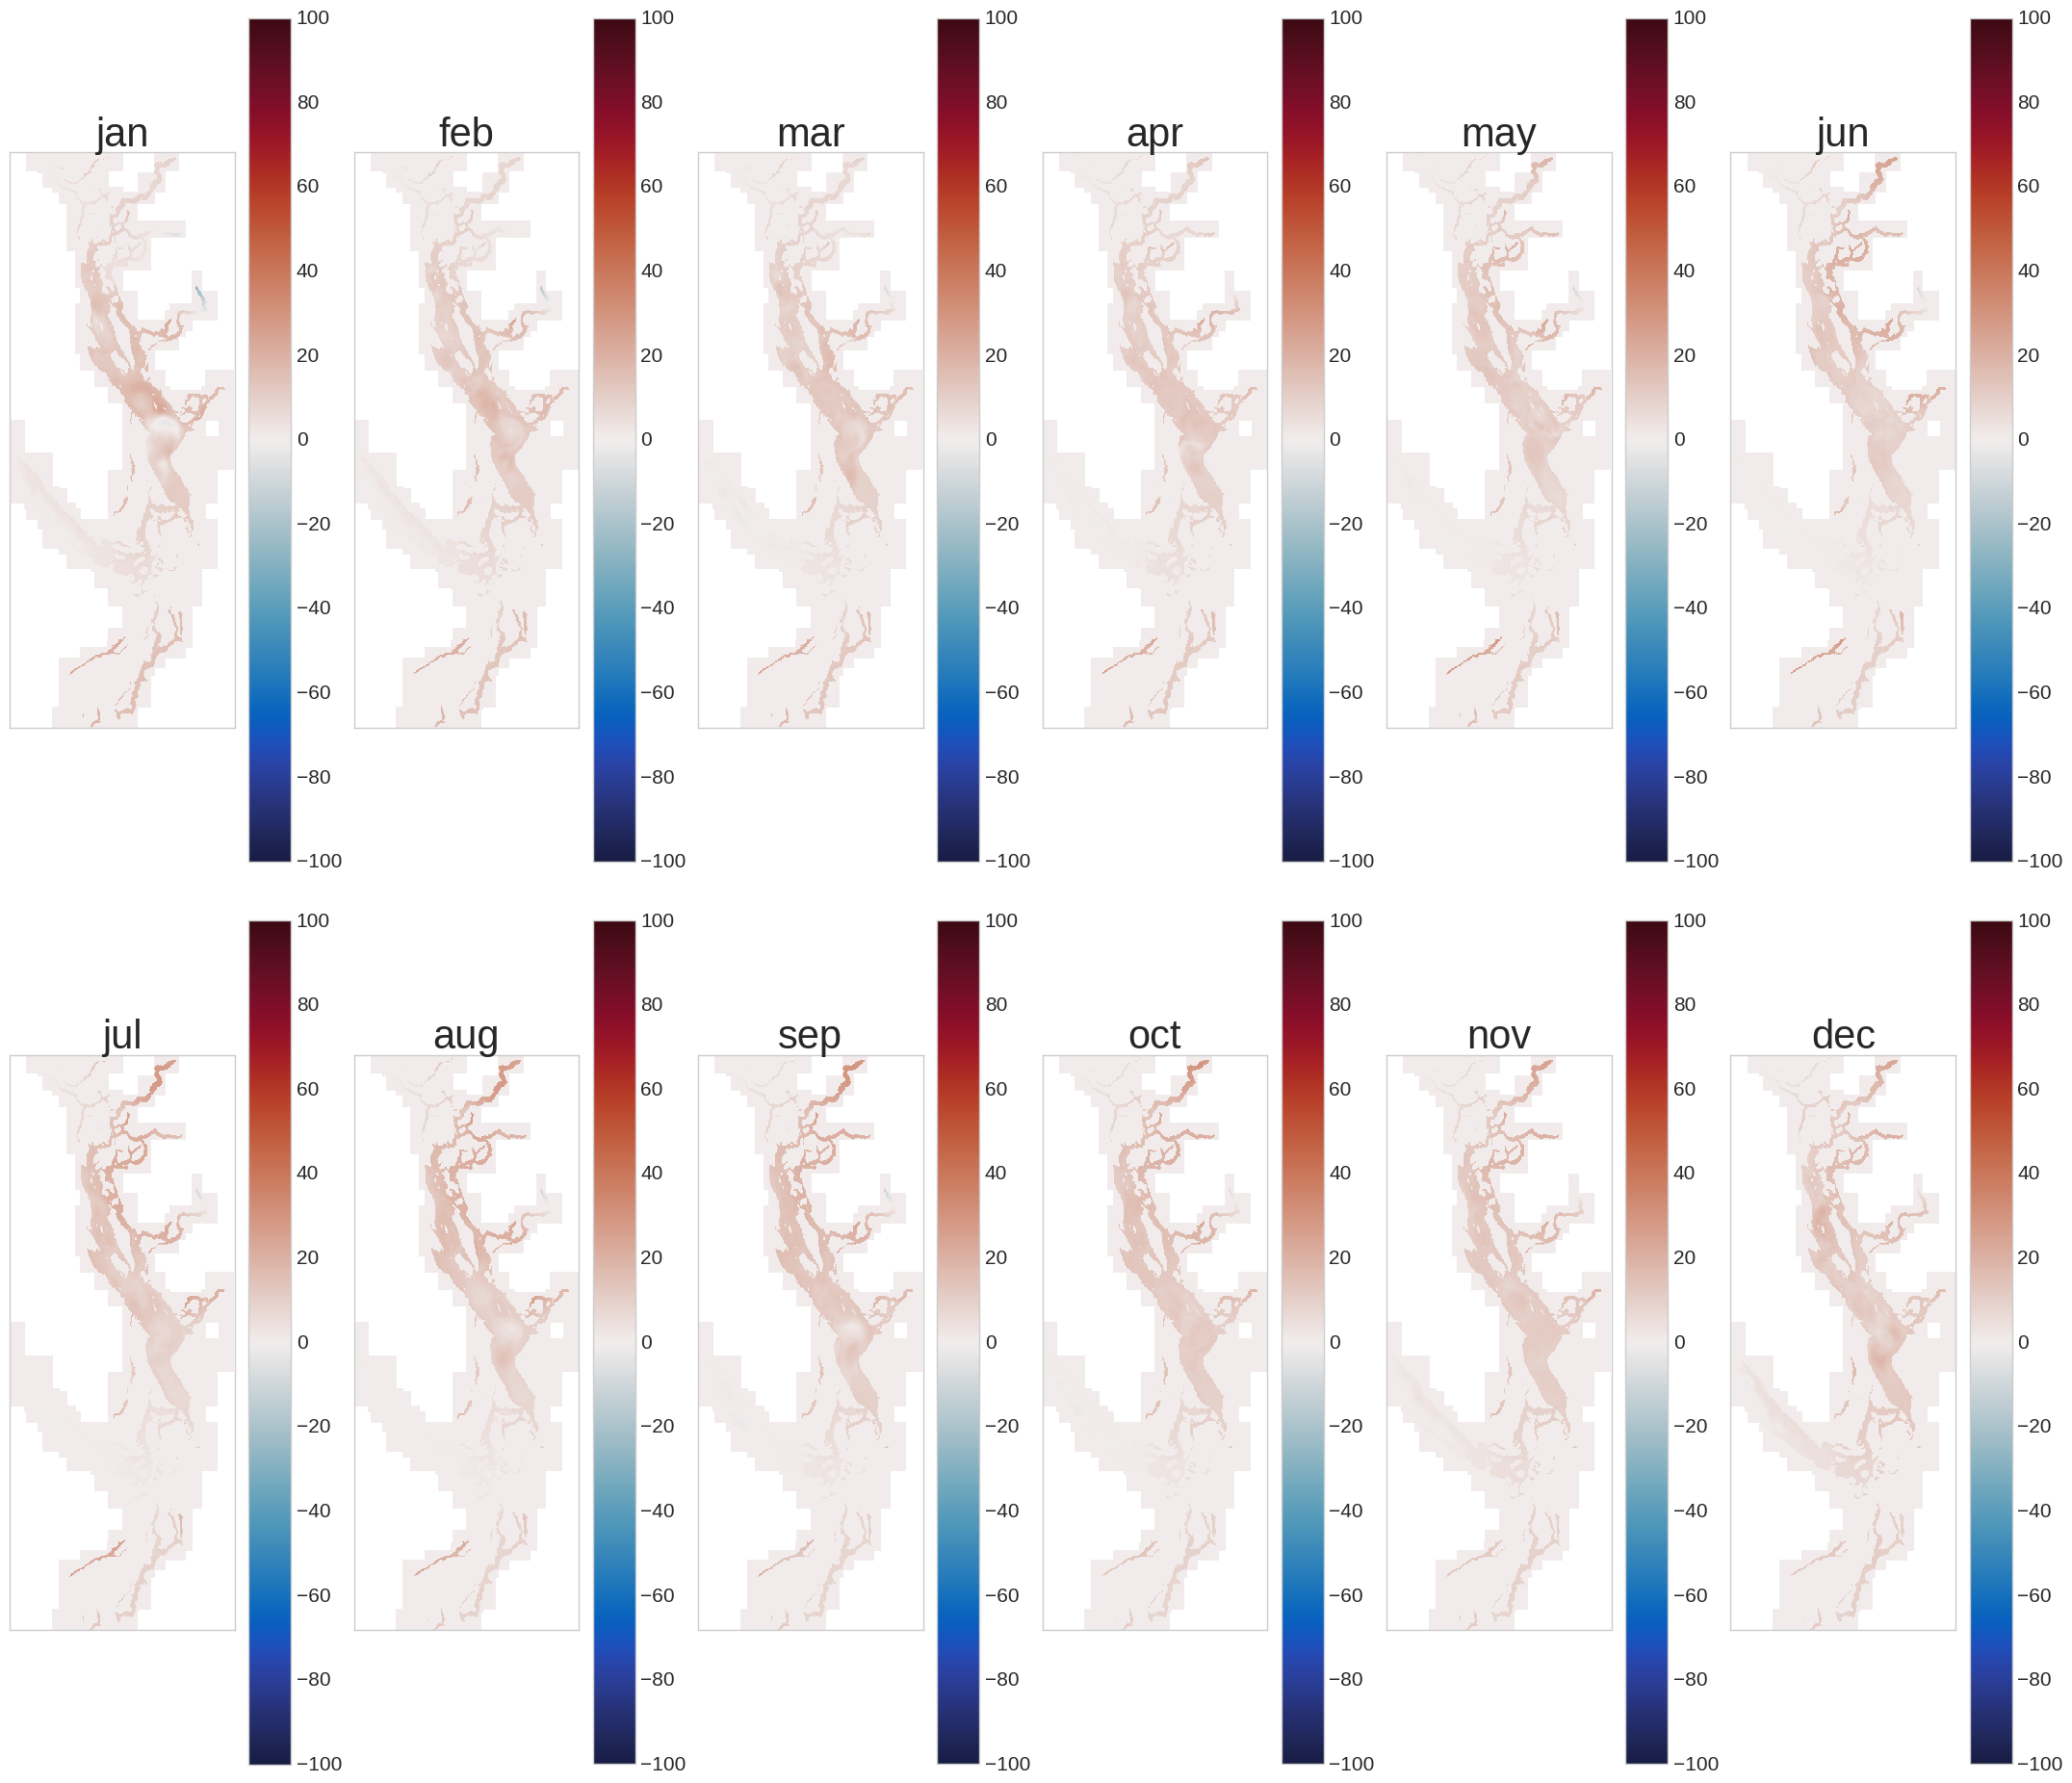

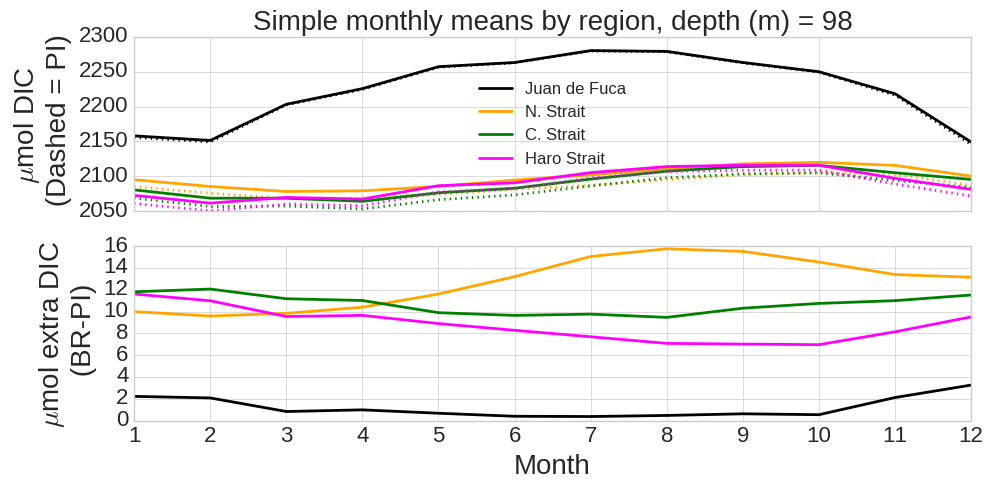

In [9]:
lev = 26

fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
avgs_BR = np.zeros([4,12])
std_devs_BR = np.zeros([4,12])
avgs_PI = np.zeros([4,12])
std_devs_PI = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['dissolved_inorganic_carbon'][0,lev,:,:]
    PI_dat = tnc_PI['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = BR_dat-PI_dat
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan
    for r in range(1,5):
        regBR = BR_dat[surfmask == r]
        regPI = PI_dat[surfmask == r] 
        avgs_BR[r-1,i-1] = np.nanmean(regBR)
        avgs_PI[r-1,i-1] = np.nanmean(regPI)
        std_devs_BR[r-1,i-1] = np.nanstd(regBR)
        std_devs_PI[r-1,i-1] = np.nanstd(regPI)
        
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
#plt.suptitle('BR - PI surface DIC', fontsize =40)
plt.tight_layout()

fact = 0.9
mons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(2,1,1)
for r in range(0,4):
    ax1.plot(mons, avgs_BR[r,:], linewidth = 2, color = colours[r], label = reg_names[r])
    ax1.plot(mons, avgs_PI[r,:], linestyle = ':', \
             linewidth = 2, color = colours[r])
    ax1.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\mu$mol DIC \n (Dashed = PI)', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

ax2 = fig.add_subplot(2,1,2)
for r in range(0,4):
    ax2.plot(mons, avgs_BR[r,:]-avgs_PI[r,:], \
             linewidth = 2, color = colours[r], label = reg_names[r])
    ax2.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax2.set_xlabel('Month', fontsize = 20)
    ax2.set_ylabel('$\mu$mol extra DIC \n (BR-PI)', fontsize = 20)
    
plt.tick_params(axis='both', which='major', labelsize=16)




## 200m 

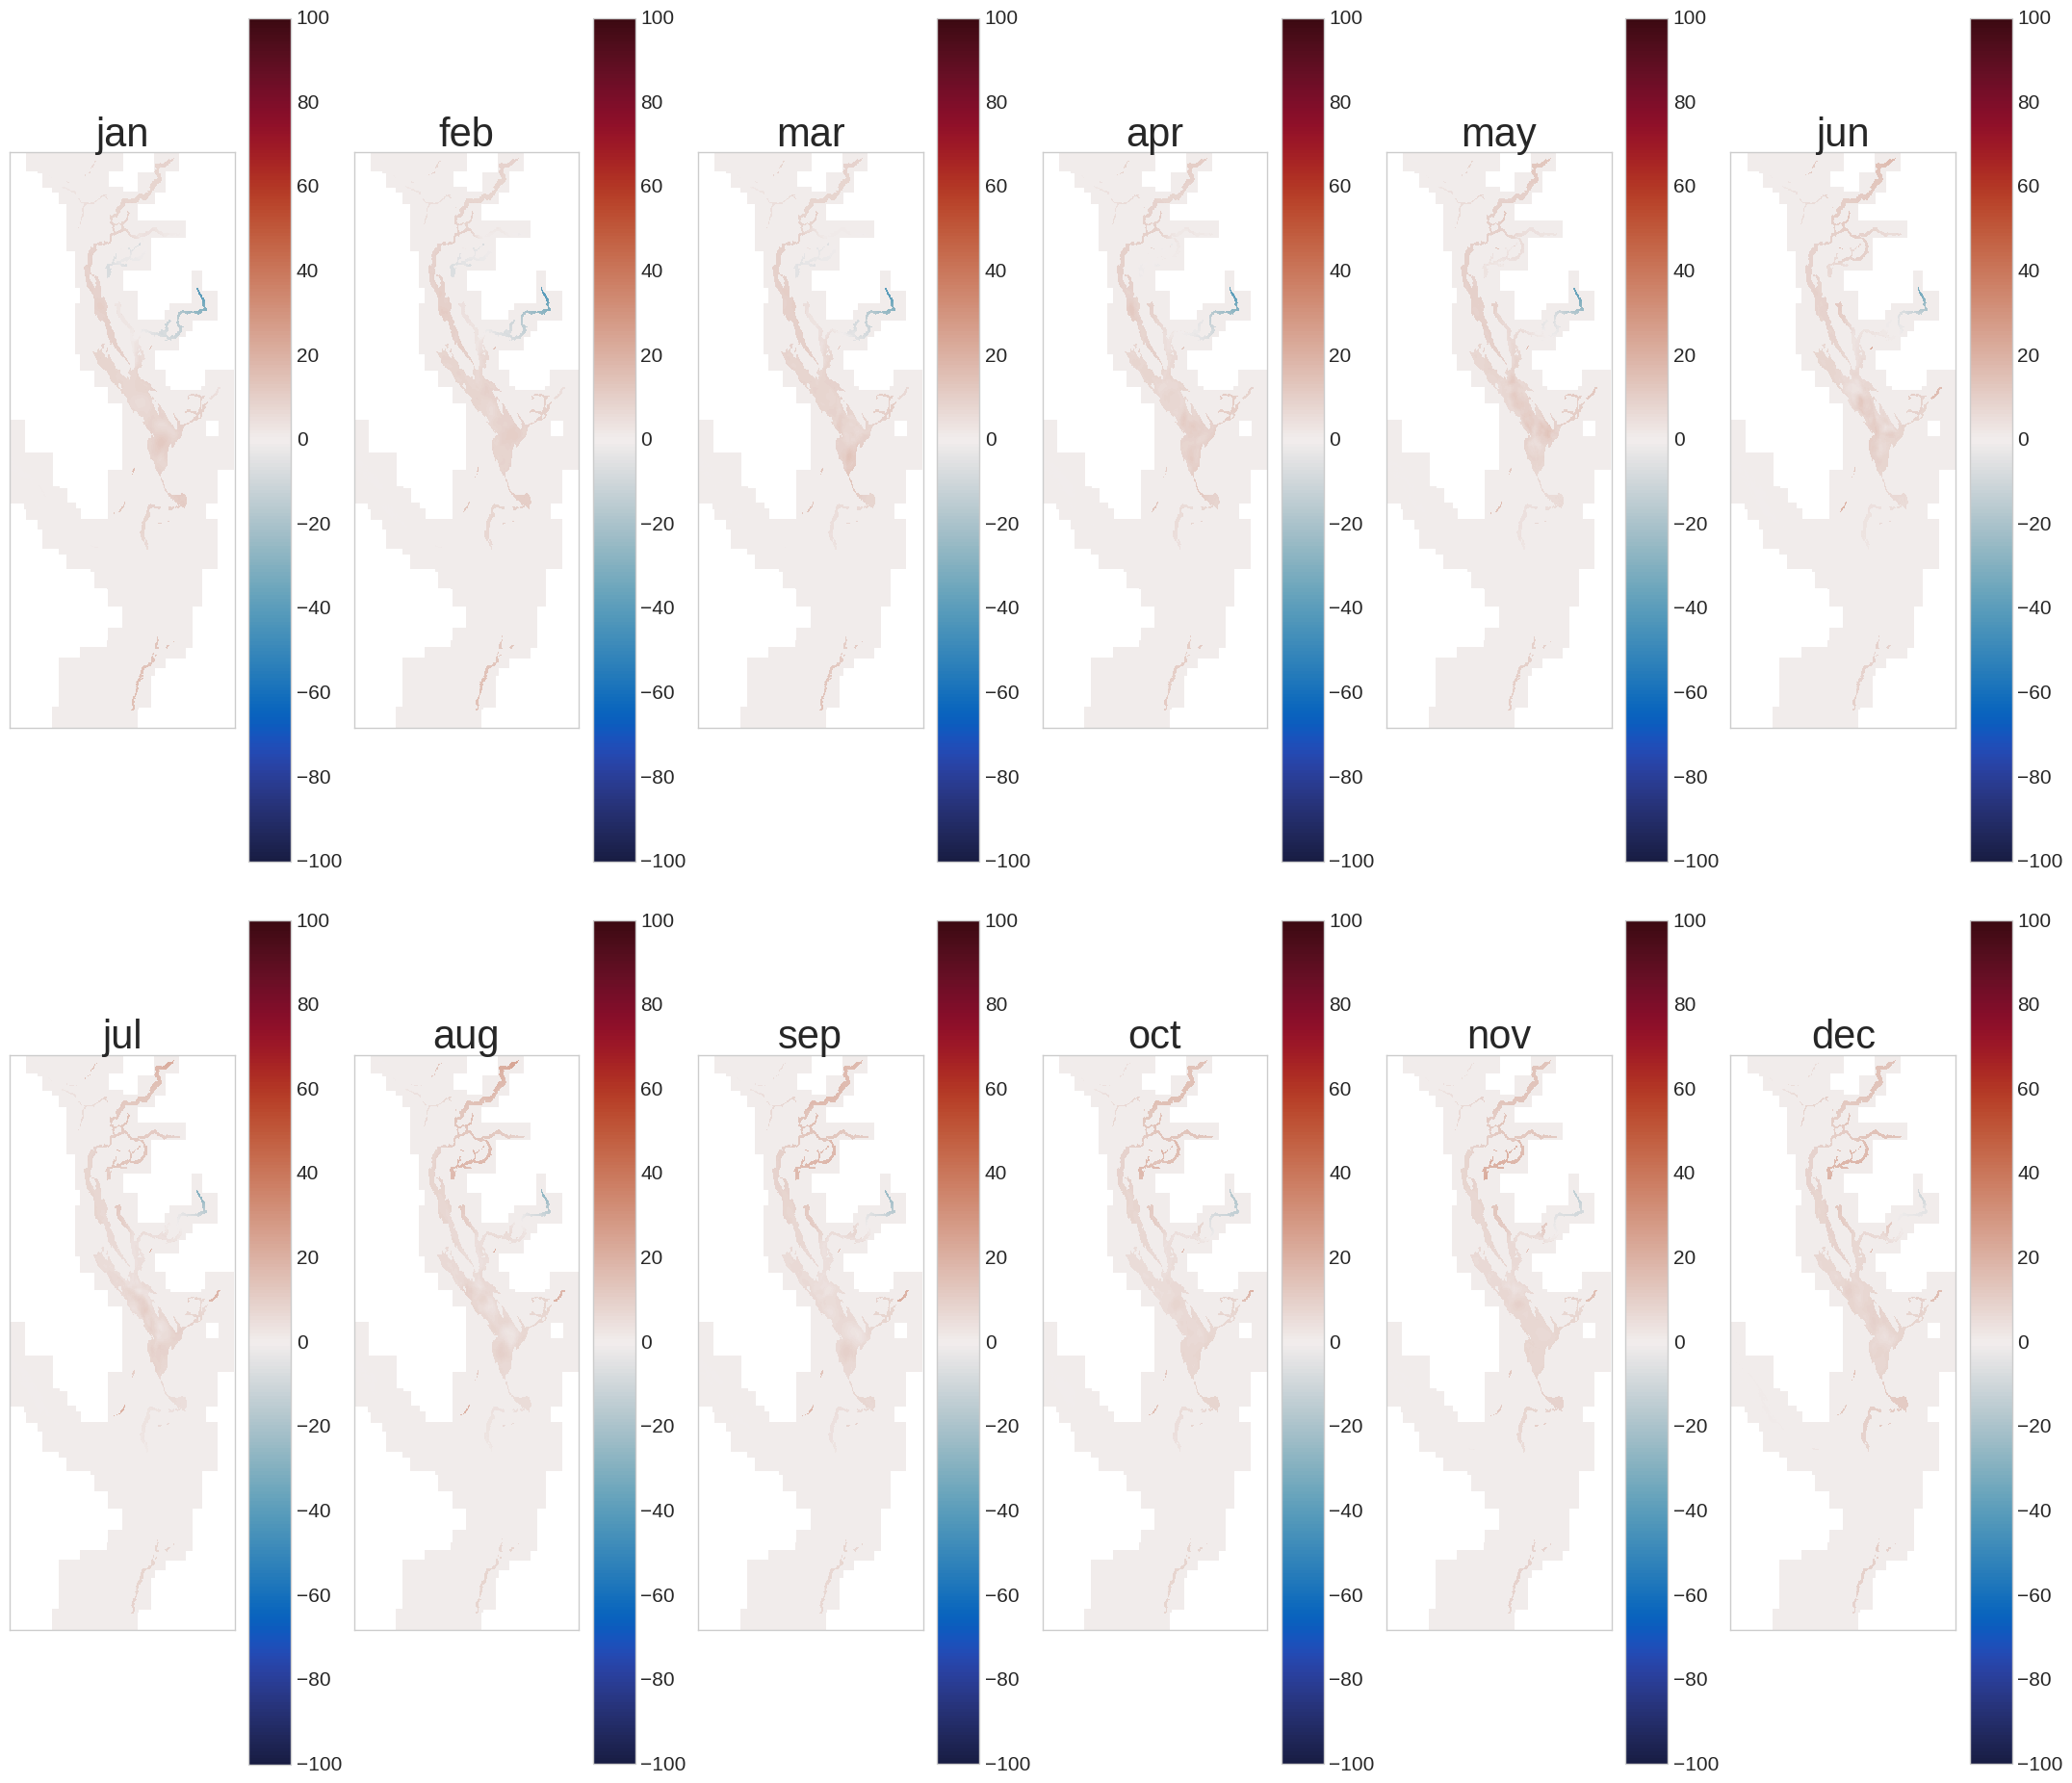

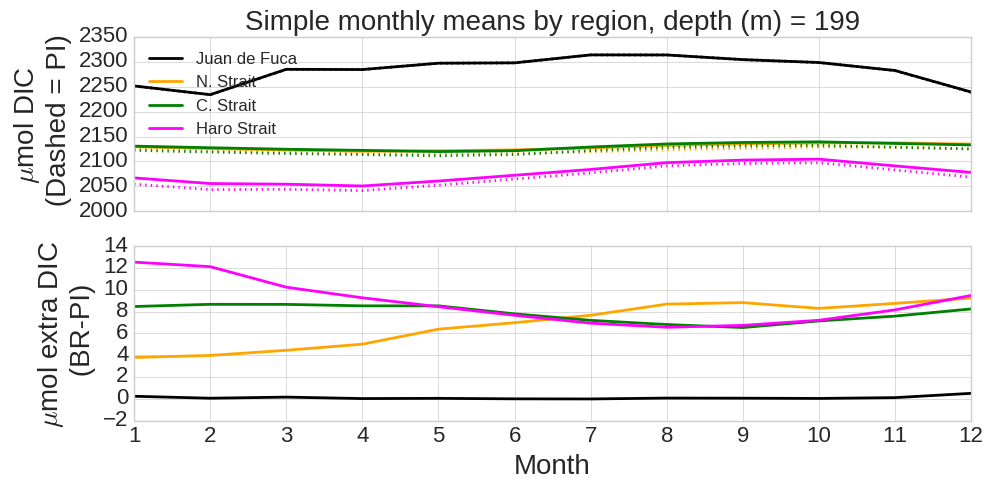

In [ ]:
lev = 30

fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
avgs_BR = np.zeros([4,12])
std_devs_BR = np.zeros([4,12])
avgs_PI = np.zeros([4,12])
std_devs_PI = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['dissolved_inorganic_carbon'][0,lev,:,:]
    PI_dat = tnc_PI['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = BR_dat-PI_dat
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan
    for r in range(1,5):
        regBR = BR_dat[surfmask == r]
        regPI = PI_dat[surfmask == r] 
        avgs_BR[r-1,i-1] = np.nanmean(regBR)
        avgs_PI[r-1,i-1] = np.nanmean(regPI)
        std_devs_BR[r-1,i-1] = np.nanstd(regBR)
        std_devs_PI[r-1,i-1] = np.nanstd(regPI)
        
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
#plt.suptitle('BR - PI surface DIC', fontsize =40)
plt.tight_layout()



fact = 0.9
mons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(2,1,1)
for r in range(0,4):
    ax1.plot(mons, avgs_BR[r,:], linewidth = 2, color = colours[r], label = reg_names[r])
    ax1.plot(mons, avgs_PI[r,:], linestyle = ':', \
             linewidth = 2, color = colours[r])
    ax1.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\mu$mol DIC \n (Dashed = PI)', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

ax2 = fig.add_subplot(2,1,2)
for r in range(0,4):
    ax2.plot(mons, avgs_BR[r,:]-avgs_PI[r,:], \
             linewidth = 2, color = colours[r], label = reg_names[r])
    ax2.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax2.set_xlabel('Month', fontsize = 20)
    ax2.set_ylabel('$\mu$mol extra DIC \n (BR-PI)', fontsize = 20)
    
plt.tick_params(axis='both', which='major', labelsize=16)




In [ ]:
levs = [0,18,23,26,30]
fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
avgs_BR_lev = np.zeros([5,4,12])
std_devs_BR_lev = np.zeros([5,4,12])
avgs_PI_lev = np.zeros([5,4,12])
std_devs_PI_lev = np.zeros([5,4,12])
for l in range(0,4):
    print(l)
    lev = levs[l]
    for i in range(1,13):
        mon = mons[i-1]
        plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
        plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
        tnc_BR =nc.Dataset(plotstr_BR)
        tnc_PI =nc.Dataset(plotstr_PI)
        BR_dat = tnc_BR['dissolved_inorganic_carbon'][0,lev,:,:]
        PI_dat = tnc_PI['dissolved_inorganic_carbon'][0,lev,:,:]
        tplt = BR_dat-PI_dat
        BR_dat[BR_dat == 0] = np.nan
        PI_dat[PI_dat == 0] = np.nan
        for r in range(1,5):
            regBR = BR_dat[surfmask == r]
            regPI = PI_dat[surfmask == r] 
            avgs_BR_lev[l,r-1,i-1] = np.nanmean(regBR)
            avgs_PI_lev[l,r-1,i-1] = np.nanmean(regPI)
            std_devs_BR_lev[l,r-1,i-1] = np.nanstd(regBR)
            std_devs_PI_lev[l,r-1,i-1] = np.nanstd(regPI)


0
1
2


In [ ]:
#avgs_BR_lev[l,r-1,i-1]
mons = np.arange(1,13,1)

fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(2,1,1)
for r in range(0,4):
    for l in range(0,5):
        tes = str(int(w['Profiles']['depth'][levs[l]]))
        tlab = reg_names[r] + ', '+tes + ' m'
        ax1.plot(mons, avgs_BR_lev[l,r,:], linewidth = l+1, \
                 color = colours[r], label = tlab )
    ax1.set_xlim([1,12])
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\mu$mol DIC (BR case) \n', fontsize = 20)
    ax1.legend(bbox_to_anchor=[1.2, 0.78], fontsize = 16)
    ax1.set_ylim([1400,2300])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('DIC by region and depth', fontsize = 20)

ax1 = fig.add_subplot(2,1,2)
for r in range(0,4):
    for l in range(0,5):
        tes = str(int(w['Profiles']['depth'][levs[l]]))
        tlab = reg_names[r] + ', '+tes + ' m'
        ax1.plot(mons, avgs_BR_lev[l,r,:]-avgs_PI_lev[l,r,:], linewidth = l+1, \
                 color = colours[r], label = tlab )
    ax1.set_xlim([1,12])
    ax1.set_xticks(np.arange(1,13,1))
    ax1.set_xticklabels([])
    ax1.set_ylabel('$\mu$mol extra DIC', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)